In [3]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [4]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_raw_snps.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Betula_pendula/Bpendula_GM_raw_snps.h5', fields='*', overwrite=True)

In [4]:
callset_fn = '/media/scervant/Transcend/GenTree_GM/Populus_nigra/Pnigra_raw_SNPs.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Pnigra_raw_SNPs.h5" (mode r)>

In [5]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [6]:
calldata = callset['calldata']

In [7]:
calldata

<HDF5 group "/calldata" (10 members)>

In [8]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [9]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QD', 'AN', 'MQ', 'SOR', 'numalt', 'QUAL', 'MQRankSum', 'ReadPosRankSum'])
variants

<VariantChunkedTable shape=(553921,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QD', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('SOR', '<f4'), ('numalt', '<i4'), ('QUAL', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4')]
   nbytes=38.0M cbytes=13.0M cratio=2.9
   values=h5py._hl.group.Group>

In [10]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


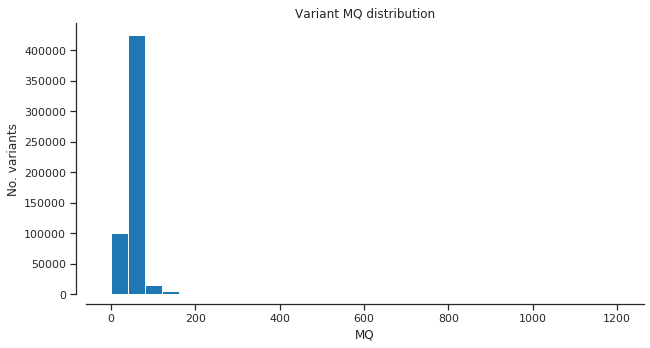

In [11]:
plot_variant_hist('MQ')

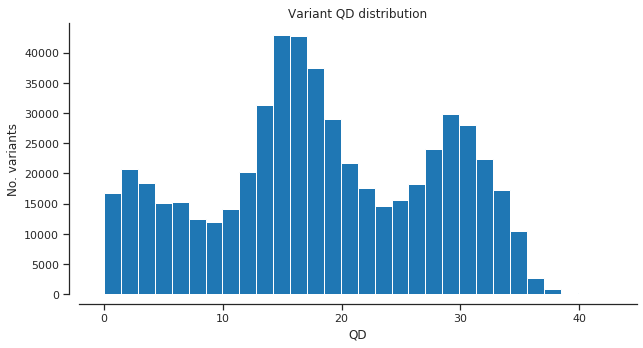

In [12]:
plot_variant_hist('QD')

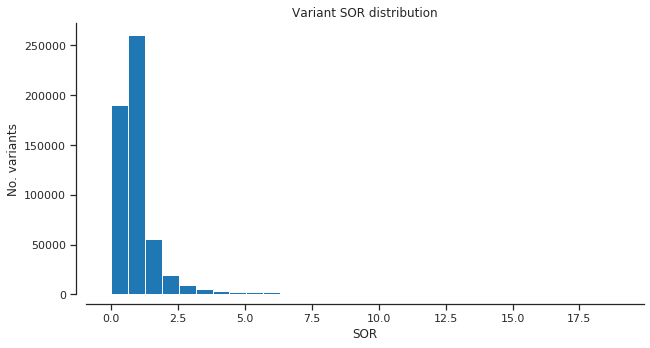

In [13]:
plot_variant_hist('SOR')

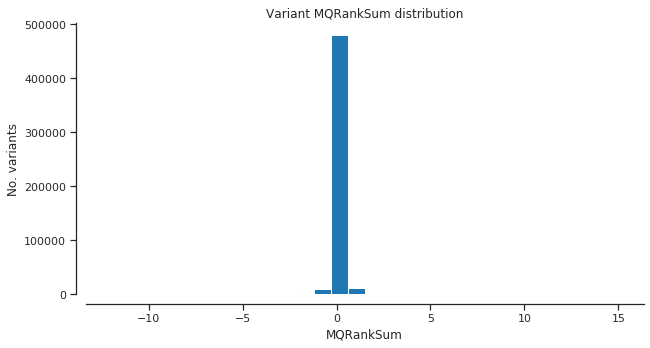

In [14]:
plot_variant_hist('MQRankSum')

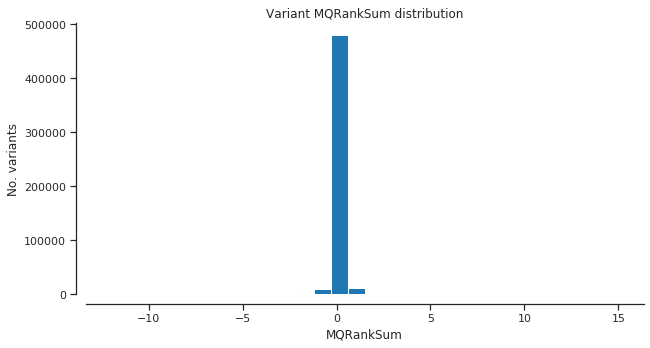

In [15]:
plot_variant_hist('MQRankSum')

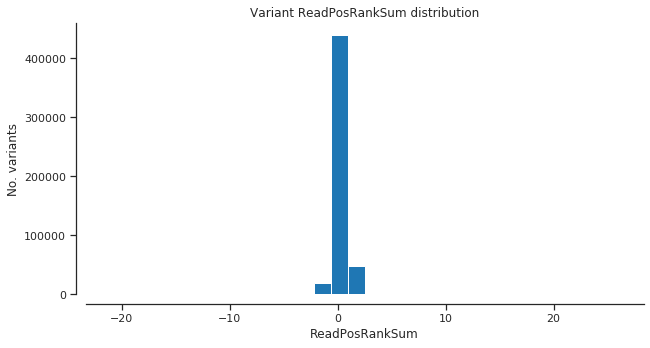

In [16]:
plot_variant_hist('ReadPosRankSum')

### Filter out positions with DP <10 and QD < 2

In [17]:
filter_expression = '(DP > 20) & (QD > 2) & (AN > 576)'
###soft filter for removing calls with very little support

In [18]:
variant_selection = variants.eval(filter_expression)[:]
variant_selection

<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater
<string>:1: RuntimeWarning: invalid value encountered in greater


array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [20]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(553921, 573, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=605.4M cbytes=56.8M cratio=10.7
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [21]:
samples = callset['samples']
samples = list(samples)
samples

['BH_PO_24_02',
 'BH_PO_24_04',
 'BH_PO_24_05',
 'BH_PO_24_07',
 'BH_PO_24_08',
 'BH_PO_24_09',
 'BH_PO_24_10',
 'BH_PO_24_11',
 'BH_PO_24_12',
 'BH_PO_24_14',
 'BH_PO_24_15',
 'BH_PO_24_16',
 'BH_PO_24_17',
 'BH_PO_24_18',
 'BH_PO_24_19',
 'BH_PO_24_20',
 'BH_PO_24_21',
 'BH_PO_24_28',
 'BH_PO_24_30',
 'CH_PO_12_01',
 'CH_PO_12_02',
 'CH_PO_12_03',
 'CH_PO_12_04',
 'CH_PO_12_05',
 'CH_PO_12_06',
 'CH_PO_12_07',
 'CH_PO_12_08',
 'CH_PO_12_09',
 'CH_PO_12_10',
 'CH_PO_12_11',
 'CH_PO_12_12',
 'CH_PO_12_13',
 'CH_PO_12_14F',
 'CH_PO_12_14L',
 'CH_PO_12_15',
 'CH_PO_12_16F',
 'CH_PO_12_17',
 'CH_PO_12_18',
 'CH_PO_12_19',
 'CH_PO_12_20',
 'CH_PO_12_21',
 'CH_PO_12_22',
 'CH_PO_12_23',
 'CH_PO_12_24',
 'CH_PO_12_25',
 'CH_PO_12_26',
 'CH_PO_12_27',
 'CH_PO_12_28',
 'CH_PO_12_29',
 'CH_PO_12_30',
 'CH_PO_12_31',
 'CH_PO_12_32',
 'CH_PO_13_01',
 'CH_PO_13_02',
 'CH_PO_13_03',
 'CH_PO_13_04',
 'CH_PO_13_05',
 'CH_PO_13_06',
 'CH_PO_13_07',
 'CH_PO_13_08',
 'CH_PO_13_09',
 'CH_PO_13_10',
 'CH_

In [22]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Populus_nigra/Pnigra_GM_raw_snps_samples.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [23]:
samples.Population.value_counts()

GB_PO_19    37
CH_PO_12    33
FR_PO_7     30
FR_PO_4     29
CH_PO_13    28
FR_PO_6     28
FR_PO_5     28
FR_PO_21    28
MR_PO_23    26
DE_PO_8     25
IT_PO_17    25
IT_PO_16    25
DE_PO_10    25
FR_PO_20    25
DE_PO_11    25
DE_PO_9     24
IT_PO_14    23
ES_PO_2     22
IT_PO_15    20
BH_PO_24    19
ES_PO_1     18
FR_PO_22    15
GR_PO_18    13
CT_PO_25     2
Name: Population, dtype: int64

In [24]:
sample_selection = samples.Population.isin({'BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'CT_PO_25', 'DE_PO_8',
       'DE_PO_9', 'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4',
       'FR_PO_5', 'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21',
       'FR_PO_22', 'GB_PO_19', 'GR_PO_18', 'IT_PO_14', 'IT_PO_15',
       'IT_PO_16', 'IT_PO_17', 'MR_PO_23'}).values
sample_selection[:5]

array([ True,  True,  True,  True,  True])

In [25]:
samples_subset = samples[sample_selection]
samples_subset.reset_index(drop=True, inplace=True)
samples_subset

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [26]:
%%time
genotypes_subset = genotypes.subset(variant_selection, sample_selection)

CPU times: user 5.66 s, sys: 114 ms, total: 5.77 s
Wall time: 6.86 s


In [27]:
genotypes_subset

<GenotypeChunkedArray shape=(504641, 573, 2) dtype=int8 chunks=(1972, 573, 2)
   nbytes=551.5M cbytes=107.5M cratio=5.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [28]:
ac = genotypes_subset.count_alleles()
ac

<AlleleCountsChunkedArray shape=(504641, 5) dtype=int32 chunks=(31541, 5)
   nbytes=9.6M cbytes=2.6M cratio=3.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

### Which ones are biallelic?

In [29]:
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[1020,    2],
       [1029,    1],
       [1017,    9],
       ...,
       [ 955,    1],
       [ 950,    4],
       [ 944,    4]], dtype=int32)

### Plot the SFS of the derived allele

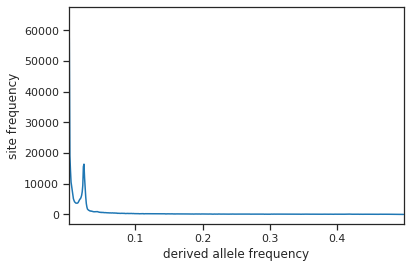

In [30]:
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

### Select only biallelic variants

In [31]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites

In [32]:
biallelic

<ChunkedArrayWrapper shape=(504641,) dtype=bool chunks=(252321,)
   nbytes=492.8K cbytes=120.5K cratio=4.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [33]:
%%time
genotypes_subset_2 = genotypes_subset.compress(biallelic)
genotypes_subset_2
###subset the array genotypes_subset by keeping only biallelic sites. 

CPU times: user 1.97 s, sys: 52.5 ms, total: 2.03 s
Wall time: 634 ms


<GenotypeChunkedArray shape=(456781, 573, 2) dtype=int8 chunks=(1785, 573, 2)
   nbytes=499.2M cbytes=91.3M cratio=5.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [34]:
genotypes_subset_2
###this subset contains the SNPs left after filtering by DP>20, QD>2, and only keeping biallelic sites

<GenotypeChunkedArray shape=(456781, 573, 2) dtype=int8 chunks=(1785, 573, 2)
   nbytes=499.2M cbytes=91.3M cratio=5.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [35]:
n_variants = len(genotypes_subset_2)
n_variants

456781

In [36]:
pc_missing = genotypes_subset_2.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes_subset_2.count_het(axis=0)[:] * 100 / n_variants

In [37]:
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [42]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'CT_PO_25', 'DE_PO_8',
       'DE_PO_9', 'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4',
       'FR_PO_5', 'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21',
       'FR_PO_22', 'GB_PO_19', 'GR_PO_18', 'IT_PO_14', 'IT_PO_15',
       'IT_PO_16', 'IT_PO_17', 'MR_PO_23'], dtype=object)

In [43]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("bright", 28)
    pop2color = {'BH_PO_24': palette[0],
                 'CH_PO_12': palette[1],
                 'CH_PO_13': palette[2],
                 'CT_PO_25': palette[3],
                 'DE_PO_8': palette[4],
                 'DE_PO_9': palette[5],
                 'DE_PO_10': palette[6],
                 'DE_PO_11': palette[8],
                 'ES_PO_1': palette[9],
                 'ES_PO_2': palette[10],
                 'FR_PO_4': palette[11],
                 'FR_PO_5': palette[12],
                 'FR_PO_6': palette[13],
                 'FR_PO_7': palette[14],
                 'FR_PO_20': palette[15],
                 'FR_PO_21': palette[16],
                 'FR_PO_22': palette[17],
                 'GB_PO_19': palette[18],
                 'GR_PO_18': palette[19],
                 'IT_PO_14': palette[23],
                 'IT_PO_15': palette[24],
                 'IT_PO_16': palette[25],
                 'IT_PO_17': palette[26],
                 'MR_PO_23': palette[27]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[19]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[24]),
               mpl.patches.Patch(color=palette[25]),
               mpl.patches.Patch(color=palette[26]),
               mpl.patches.Patch(color=palette[27])]
    ax.legend(handles=handles, labels=['BH-PO-24', 'CH-PO-12', 'CH-PO-13', 'CT-PO-25', 'DE-PO-8',
       'DE-PO-9', 'DE-PO-10', 'DE-PO-11', 'ES-PO-1',
       'ES-PO-2', 'FR-PO-4', 'FR-PO-5', 'FR-PO-6', 'FR-PO-7', 'FR-PO-20',
       'FR-PO-21', 'FR-PO-22', 'GB-PO-19', 'GR-PO-18', 'IT-PO-14',
       'IT-PO-15', 'IT-PO-16', 'IT-PO-17', 'MR-PO-23'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

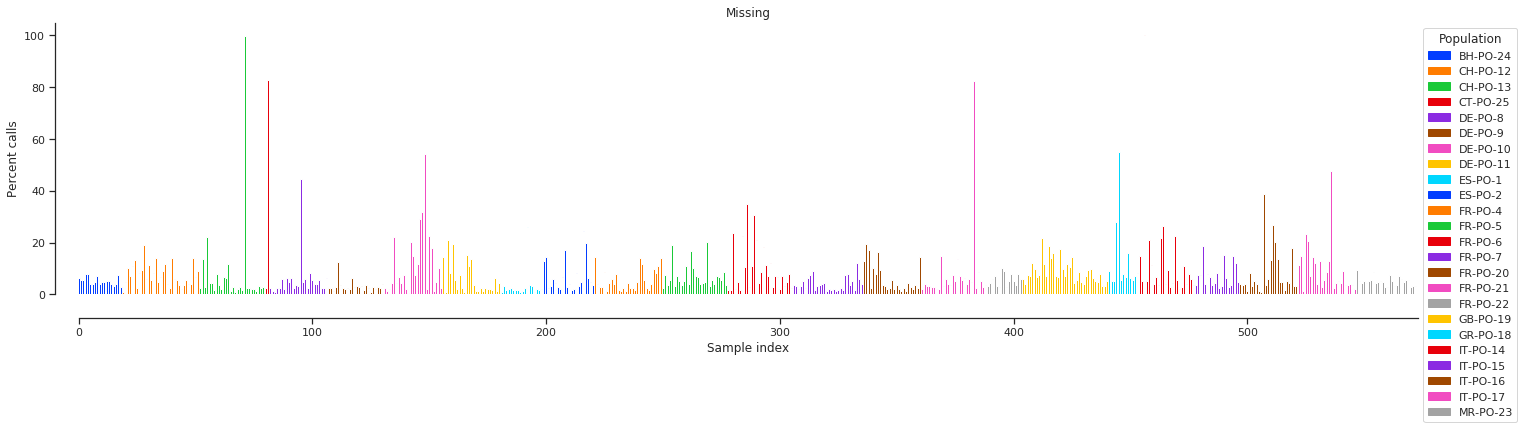

In [44]:
plot_genotype_frequency(pc_missing, 'Missing')

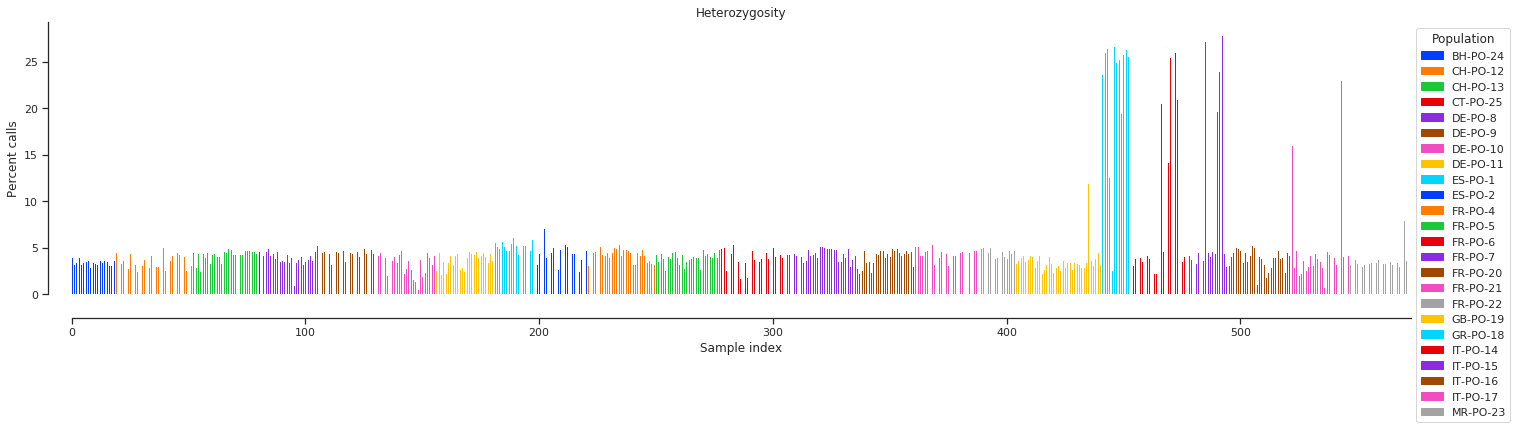

In [45]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [39]:
np.argsort(pc_missing)[-1]
###sample with highest amount of missing data

456

In [40]:
samples = samples_subset
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [41]:
populations = samples.Population.unique()

In [42]:
populations

array(['BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'CT_PO_25', 'DE_PO_8',
       'DE_PO_9', 'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4',
       'FR_PO_5', 'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21',
       'FR_PO_22', 'GB_PO_19', 'GR_PO_18', 'IT_PO_14', 'IT_PO_15',
       'IT_PO_16', 'IT_PO_17', 'MR_PO_23'], dtype=object)

In [43]:
ac2 = genotypes_subset_2.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(456781, 2) dtype=int32 chunks=(57098, 2)
   nbytes=3.5M cbytes=1.3M cratio=2.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [45]:
palette = sns.color_palette("hls",30)
pop_colours = {        
    'BH_PO_24': palette[0],
                 'CH_PO_12': palette[1],
                 'CH_PO_13': palette[2],
                 'CT_PO_25': palette[3],
                 'DE_PO_8': palette[4],
                 'DE_PO_9': palette[5],
                 'DE_PO_10': palette[6],
                 'DE_PO_10_E': palette[7],
                 'DE_PO_11': palette[8],
                 'ES_PO_1': palette[9],
                 'ES_PO_2': palette[10],
                 'FR_PO_4': palette[11],
                 'FR_PO_5': palette[12],
                 'FR_PO_6': palette[13],
                 'FR_PO_7': palette[14],
                 'FR_PO_20': palette[15],
                 'FR_PO_21': palette[16],
                 'FR_PO_22': palette[17],
                 'GB_PO_19': palette[18],
                 'GR_PO_18': palette[19],
                 'IT_PO_14': palette[23],
                 'IT_PO_15': palette[24],
                 'IT_PO_16': palette[25],
                 'IT_PO_17': palette[26],
                 'MR_PO_23': palette[27]
     }

In [46]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [47]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = genotypes_subset_2.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(368107, 573) dtype=int8 chunks=(2876, 573)
   nbytes=201.2M cbytes=30.3M cratio=6.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [48]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

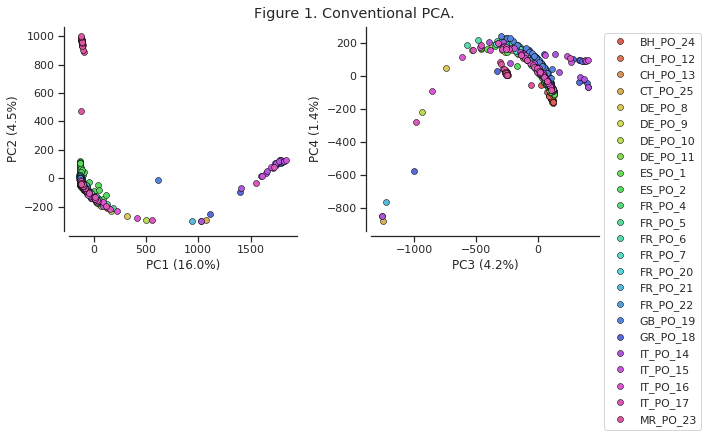

In [49]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [51]:
weirdos = coords1[:,0]>600
samples[weirdos]
###filter samples base in PC2. Expression gives a list samples above 500

,ID,Population
71,CH_PO_13_20,CH_PO_13
81,CT_PO_25_02,CT_PO_25
383,FR_PO_21_23,FR_PO_21
435,GB_PO_19_81,GB_PO_19
441,GR_PO_18_01,GR_PO_18
442,GR_PO_18_02,GR_PO_18
443,GR_PO_18_05,GR_PO_18
444,GR_PO_18_06,GR_PO_18
445,GR_PO_18_08,GR_PO_18
446,GR_PO_18_09,GR_PO_18


In [52]:
samples2 = samples[~weirdos]

In [53]:
samples2

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [54]:
allT = np.repeat(True, len(genotypes_subset_2))

In [55]:
genotypes_subset_3 = genotypes_subset_2.subset(allT, ~weirdos)

In [56]:
genotypes_subset_3

<GenotypeChunkedArray shape=(456781, 541, 2) dtype=int8 chunks=(1785, 541, 2)
   nbytes=471.3M cbytes=76.4M cratio=6.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples2.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [58]:
ac3 = genotypes_subset_3.count_alleles()
ac3

<AlleleCountsChunkedArray shape=(456781, 2) dtype=int32 chunks=(57098, 2)
   nbytes=3.5M cbytes=1.3M cratio=2.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [59]:
flt2 = (ac3[:, :2].min(axis=1) > 1)
gf2 = genotypes_subset_3.compress(flt2, axis=0)
gn2 = gf2.to_n_alt()

In [60]:
coords2, model2 = allel.pca(gn2, n_components=10, scaler='patterson')

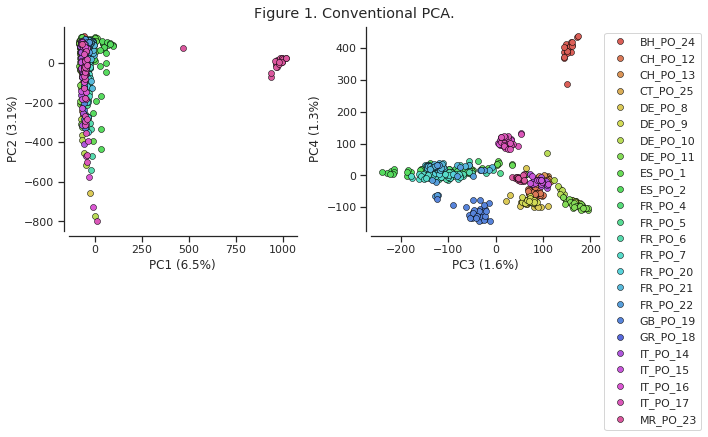

In [61]:
fig_pca(coords2, model2, 'Figure 1. Conventional PCA.')

In [62]:
weirdos2 = coords2[:,1]<-650
samples2[weirdos2]

,ID,Population
95,DE_PO_08_14,DE_PO_8
148,DE_PO_10_18,DE_PO_10
507,IT_PO_16_11,IT_PO_16
536,IT_PO_17_15,IT_PO_17


In [63]:
samples3 = samples2[~weirdos2]
samples3

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
568,MR_PO_23_57,MR_PO_23
569,MR_PO_23_59,MR_PO_23
570,MR_PO_23_60,MR_PO_23
571,MR_PO_23_62,MR_PO_23


In [64]:
allT = np.repeat(True, len(genotypes_subset_3))
genotypes_subset_4 = genotypes_subset_3.subset(allT, ~weirdos2)
genotypes_subset_4

<GenotypeChunkedArray shape=(456781, 537, 2) dtype=int8 chunks=(1785, 537, 2)
   nbytes=467.9M cbytes=73.7M cratio=6.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [65]:
ac4 = genotypes_subset_4.count_alleles()
ac4

<AlleleCountsChunkedArray shape=(456781, 2) dtype=int32 chunks=(57098, 2)
   nbytes=3.5M cbytes=1.3M cratio=2.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [66]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples3.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()
    
###Check that you have assigned the corresponding population list on the sample_population definition

In [67]:
ac = genotypes_subset_4.count_alleles()
flt4 = (ac[:, :2].min(axis=1) > 1)
gf4 = genotypes_subset_4.compress(flt4, axis=0)
gn = gf4.to_n_alt()

###Keeping track of the genotypes subsettings is hard!!! 

In [68]:
coords3, model3 = allel.pca(gn, n_components=10, scaler='patterson')
###modify the number of coords and model according to the number of graphs you have generated

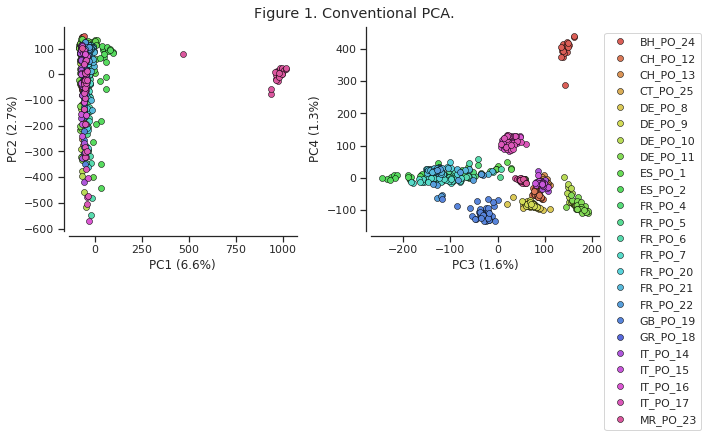

In [69]:
fig_pca(coords3, model3, 'Figure 1. Conventional PCA.')

In [196]:
BETULA TEMPLATE FROM HERE ONWARDS




#weirdos3 = coords3[:,0]>100
#samples3[weirdos3]
###NOTICE filter over PC1 axes [:,0]
### Filter over PC2 [:,1]

,ID,Population
12,YT-1045,YT
24,FI-BP-20-01,FI-BP-20
29,LT-BP-11-08,LT-BP-11
42,ES-BP-01-15,ES-BP-1
45,FI-BBU,FI-BBU
53,LT-BP-12-16,LT-BP-12
66,ES-BP-01-06,ES-BP-1
74,NO-BP-15-17,NO-BP-15
89,ES-BP-01-02,ES-BP-1
98,FR-BP-21-06,FR-BP-21


In [197]:
samples4 = samples3[~weirdos3]
samples4

,ID,Population
0,CH-BP-05-01,CH-BP-5
1,DE-BP-10-13,DE-BP-10
2,GB-BP-14-27,GB-BP-14
3,NO-BP-15-06,NO-BP-15
4,IT-BP-08-02,IT-BP-8
...,...,...
571,DE-BP-09-08,DE-BP-9
572,IT-BP-08-17,IT-BP-8
573,CH-BP-05-15,CH-BP-5
574,CH-BP-05-09,CH-BP-5


In [198]:
allT = np.repeat(True, len(genotypes_subset_4))
genotypes_subset_5 = genotypes_subset_4.subset(allT, ~weirdos3)
genotypes_subset_5

<GenotypeChunkedArray shape=(690551, 517, 2) dtype=int8 chunks=(2698, 517, 2)
   nbytes=681.0M cbytes=75.0M cratio=9.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [199]:
ac5 = genotypes_subset_5.count_alleles()
flt5 = (ac5[:, :2].min(axis=1) > 1)
gf5 = genotypes_subset_5.compress(flt5, axis=0)
gn = gf5.to_n_alt()

In [200]:
coords4, model4 = allel.pca(gn, n_components=10, scaler='patterson')

In [201]:
def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples4.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

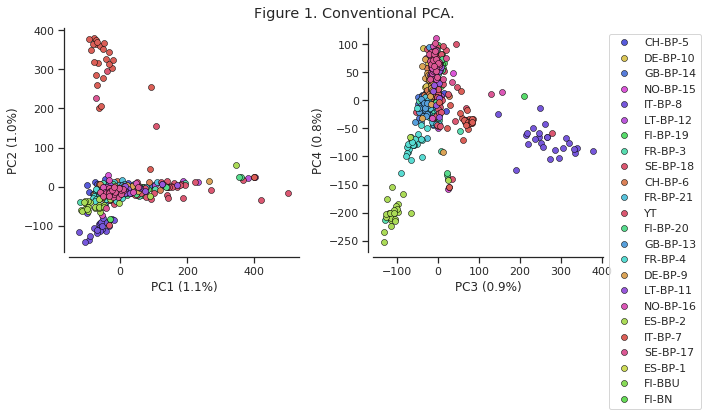

In [202]:
fig_pca(coords4, model4, 'Figure 1. Conventional PCA.')